Made with ❤︎ by Alessio Vaccaro

# Intro

For more info about this notebook please refer to:

- [My Website](https://www.alessiovaccaro.com)
- [My Medium Article]()

# 0. Import packages

In [101]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import itertools
from matplotlib.patches import Rectangle

# 1. Open Image

In [102]:
IMG_PATH = "data/PRS_L2C_STD_20200410094150_20200410094154_0001.he5"

In [103]:
data = h5py.File(IMG_PATH, mode='r')

# 2. Explore Attributes

In [104]:
dict(data.attrs)

{'Acquisition_Purpose': b'NOT SPECIAL PRODUCT',
 'Acquisition_Size': b'30 Km',
 'Acquisition_Station': b'CNM',
 'Acquisition_Type': b'EARTH OBSERVATION',
 'Atm_LutGeomInfo_RelativeAzimuth': array([b'RAA_050', b'RAA_085'], dtype=object),
 'Atm_LutGeomInfo_SunZenith': array([b'SZA_035', b'SZA_050'], dtype=object),
 'Atm_LutGeomInfo_ViewZenith': array([b'VZA_010', b'VZA_020'], dtype=object),
 'Atm_Lut_version': b'1.1.2',
 'Atmo_RTM_info': b'MODTRAN6',
 'Atmo_profile_info': b'ATM_MIDLAT_SUMMER',
 'Aux_SunEarthDistance': b'PRS_AUX_D_SUN_20180201000000_21000101000000_0001.xml',
 'Aux_SunIrradiance': b'PRS_AUX_S_IRR_20180201000000_21000101000000_0001.xml',
 'CNM_L2_BINNING': 1,
 'CNM_L2_BIN_ON': 1,
 'CNM_L2_BSEL_ON': 0,
 'CNM_L2_HGRP': 1,
 'CNM_PAN_ACQ': 1,
 'CNM_SWIR_ACQ': 1,
 'CNM_SWIR_SELECT': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [105]:
print(len(data.attrs["List_Cw_Vnir"]))
print(len(data.attrs["List_Cw_Swir"]))

66
173


# 3. Surface Panchromatic Reflectance Coregirestered

In [106]:
pan_img = np.rot90(data["HDFEOS"]['SWATHS']["PRS_L2C_PCO"]["Data Fields"]["Cube"][:], k=3)

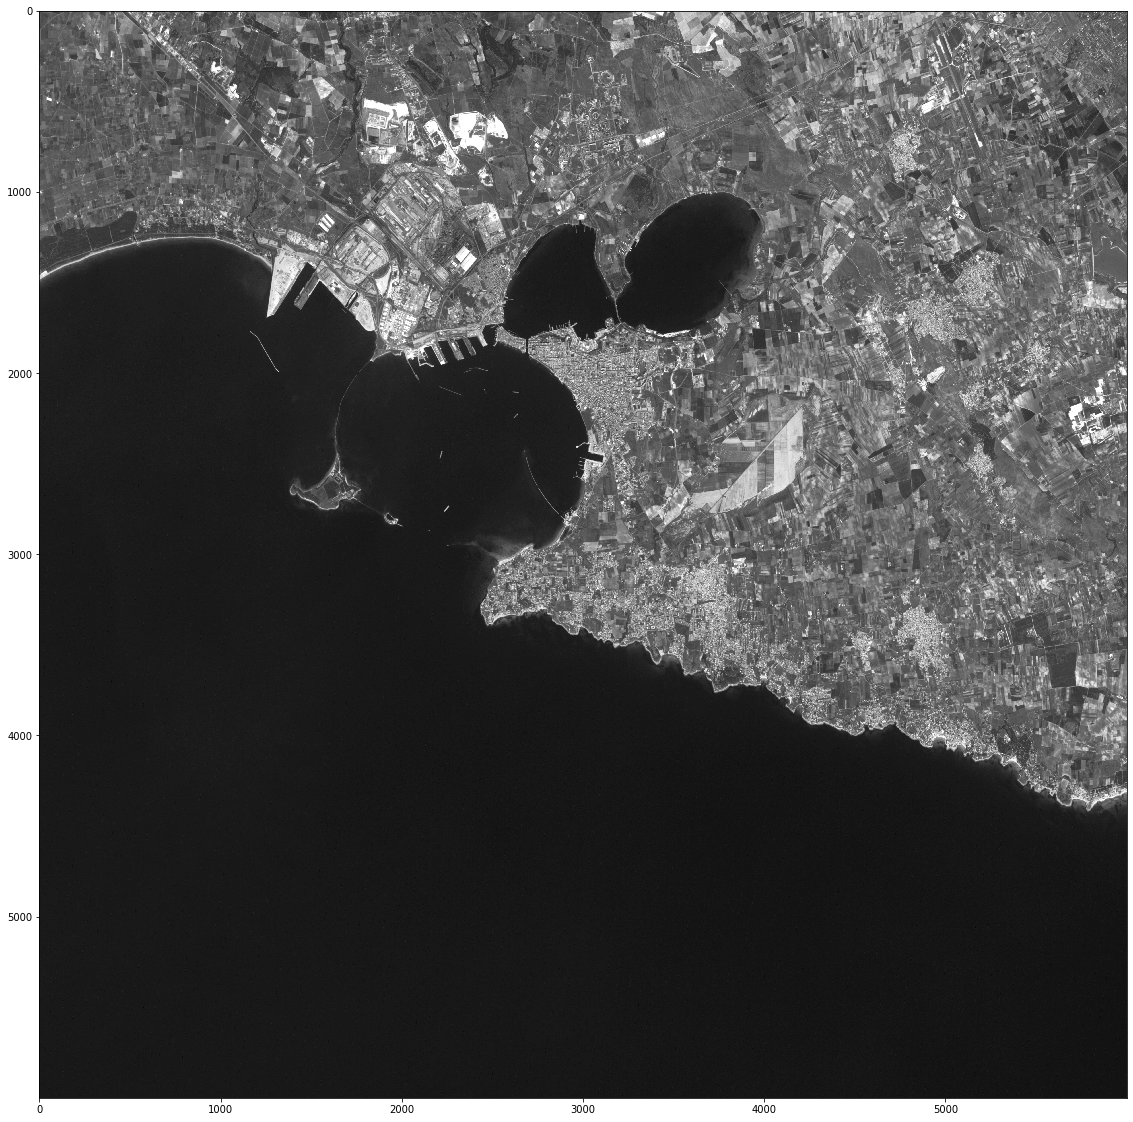

In [107]:
plt.figure(figsize=(20,20))
plt.imshow(pan_img,cmap="Greys_r")

# 4. VNIR & SWIR Surface Spectral Reflectance Coregirestered

In [108]:
vnir_cube = data["HDFEOS"]['SWATHS']["PRS_L2C_HCO"]["Data Fields"]["VNIR_Cube"]
vnir_rot_cube = np.rot90(vnir_cube, k=3, axes=(0,2))

In [109]:
swir_cube = data["HDFEOS"]['SWATHS']["PRS_L2C_HCO"]["Data Fields"]["SWIR_Cube"]
swir_rot_cube = np.rot90(swir_cube, k=3, axes=(0,2))

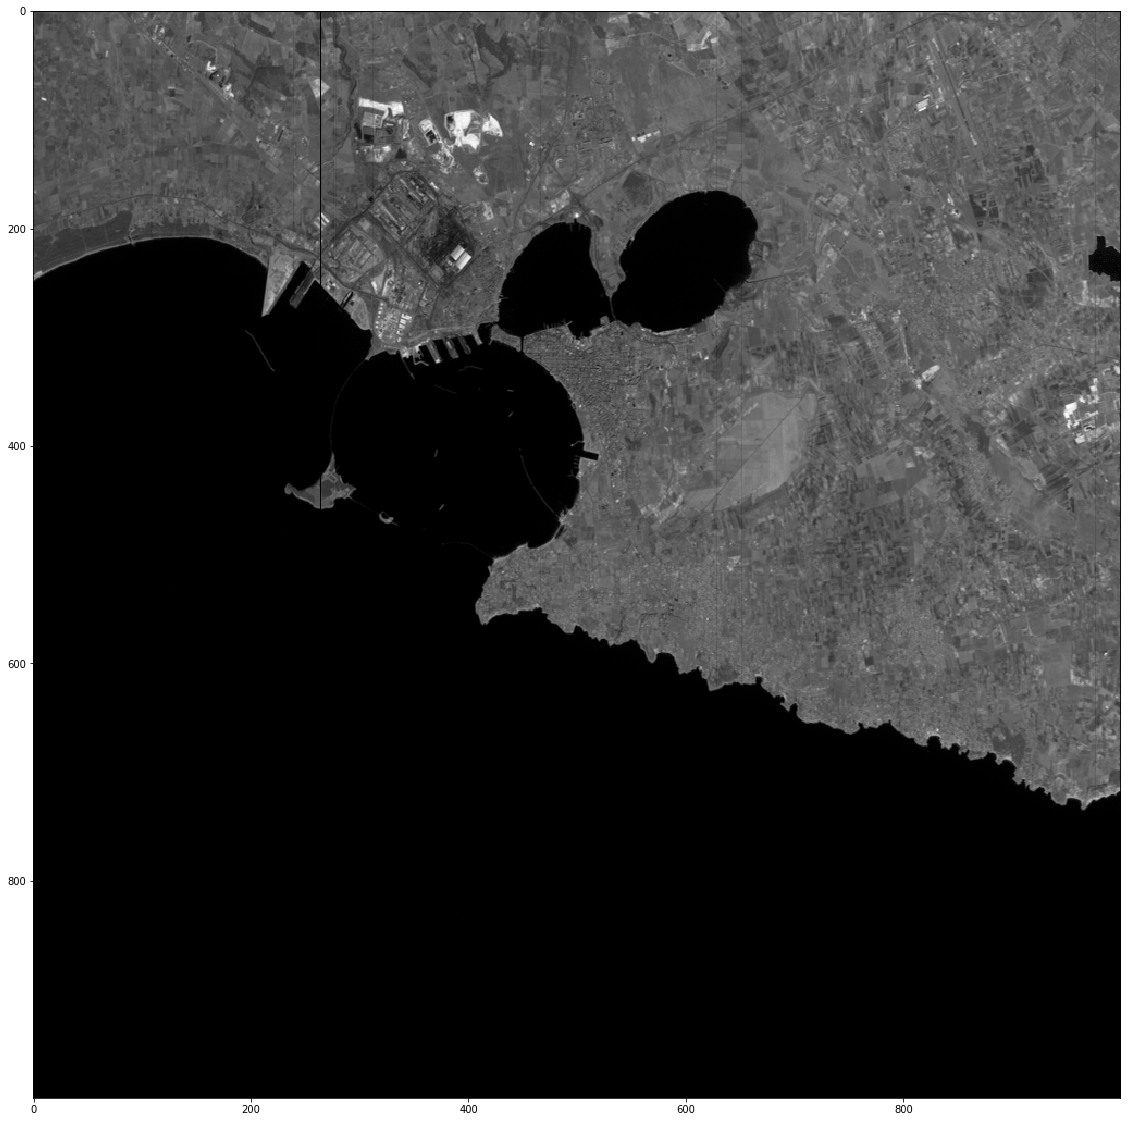

In [110]:
plt.figure(figsize=(20,20))
plt.imshow(vnir_rot_cube[:,27,:],cmap="Greys_r")

# 5. RGB Composite

In [112]:
VNIR_BANDS = data.attrs["List_Cw_Vnir"]
VNIR_BANDS

array([  0.     ,   0.     ,   0.     , 972.41174, 962.03625, 951.10895,
       939.63104, 929.16315, 918.94617, 908.4094 , 897.7496 , 887.02893,
       876.40393, 865.7161 , 854.94934, 844.1955 , 833.5211 , 822.9157 ,
       812.3102 , 801.7064 , 791.1328 , 780.6867 , 770.3032 , 759.8692 ,
       749.5064 , 739.1944 , 729.02484, 718.95306, 708.77374, 698.8877 ,
       689.2016 , 679.26074, 669.6074 , 660.0572 , 650.5845 , 641.1268 ,
       631.93933, 622.9988 , 613.9795 , 605.1952 , 596.2837 , 587.6361 ,
       579.168  , 570.8205 , 562.55664, 554.3869 , 546.30585, 538.319  ,
       530.501  , 522.7496 , 515.0126 , 507.4975 , 499.973  , 492.53827,
       485.24365, 478.01245, 470.78543, 463.56787, 456.21646, 448.87247,
       441.49777, 434.14847, 426.8044 , 419.202  , 411.12772, 402.24652],
      dtype=float32)

In [113]:
SWIR_BANDS = data.attrs["List_Cw_Swir"]
SWIR_BANDS

array([2496.8342 , 2489.9966 , 2483.5571 , 2476.7478 , 2469.3806 ,
       2462.7773 , 2456.2874 , 2448.8875 , 2442.152  , 2435.291  ,
       2428.3562 , 2420.946  , 2414.1235 , 2407.295  , 2399.7622 ,
       2392.8093 , 2385.7668 , 2378.4663 , 2371.3008 , 2364.334  ,
       2356.9778 , 2349.5396 , 2342.5505 , 2335.1882 , 2327.571  ,
       2320.5981 , 2312.8647 , 2305.4658 , 2298.2896 , 2290.5312 ,
       2283.2393 , 2275.723  , 2268.0017 , 2260.5886 , 2252.8054 ,
       2245.175  , 2237.6055 , 2229.7112 , 2222.1543 , 2214.2947 ,
       2206.5571 , 2198.846  , 2190.792  , 2183.1443 , 2175.0261 ,
       2167.2144 , 2159.2424 , 2151.083  , 2143.1863 , 2135.19   ,
       2127.054  , 2118.91   , 2110.7798 , 2102.5032 , 2094.3718 ,
       2086.0544 , 2077.7122 , 2069.4963 , 2061.0984 , 2052.716  ,
       2044.3796 , 2035.9515 , 2027.4346 , 2019.0046 , 2010.3689 ,
       2001.7985 , 1993.2458 , 1984.4974 , 1975.7433 , 1967.0123 ,
       1958.3286 , 1949.596  , 1940.7843 , 1931.9473 , 1923.04

In [143]:
r = vnir_rot_cube[:, np.where(VNIR_BANDS == 641.1268)[0][0], :]
g = vnir_rot_cube[:, np.where(VNIR_BANDS == 587.6361)[0][0], :]
b = vnir_rot_cube[:, np.where(VNIR_BANDS == 478.01245)[0][0], :]

In [144]:
MULT_FACTOR = 3
rgbImg = np.zeros((1000,1000,3))
rgbImg[:,:,0] = (r - r.min()) / (r.max()-r.min()) * MULT_FACTOR
rgbImg[:,:,1] = (g - g.min()) / (g.max()-g.min()) * MULT_FACTOR
rgbImg[:,:,2] = (b - b.min()) / (b.max()-b.min()) * MULT_FACTOR 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


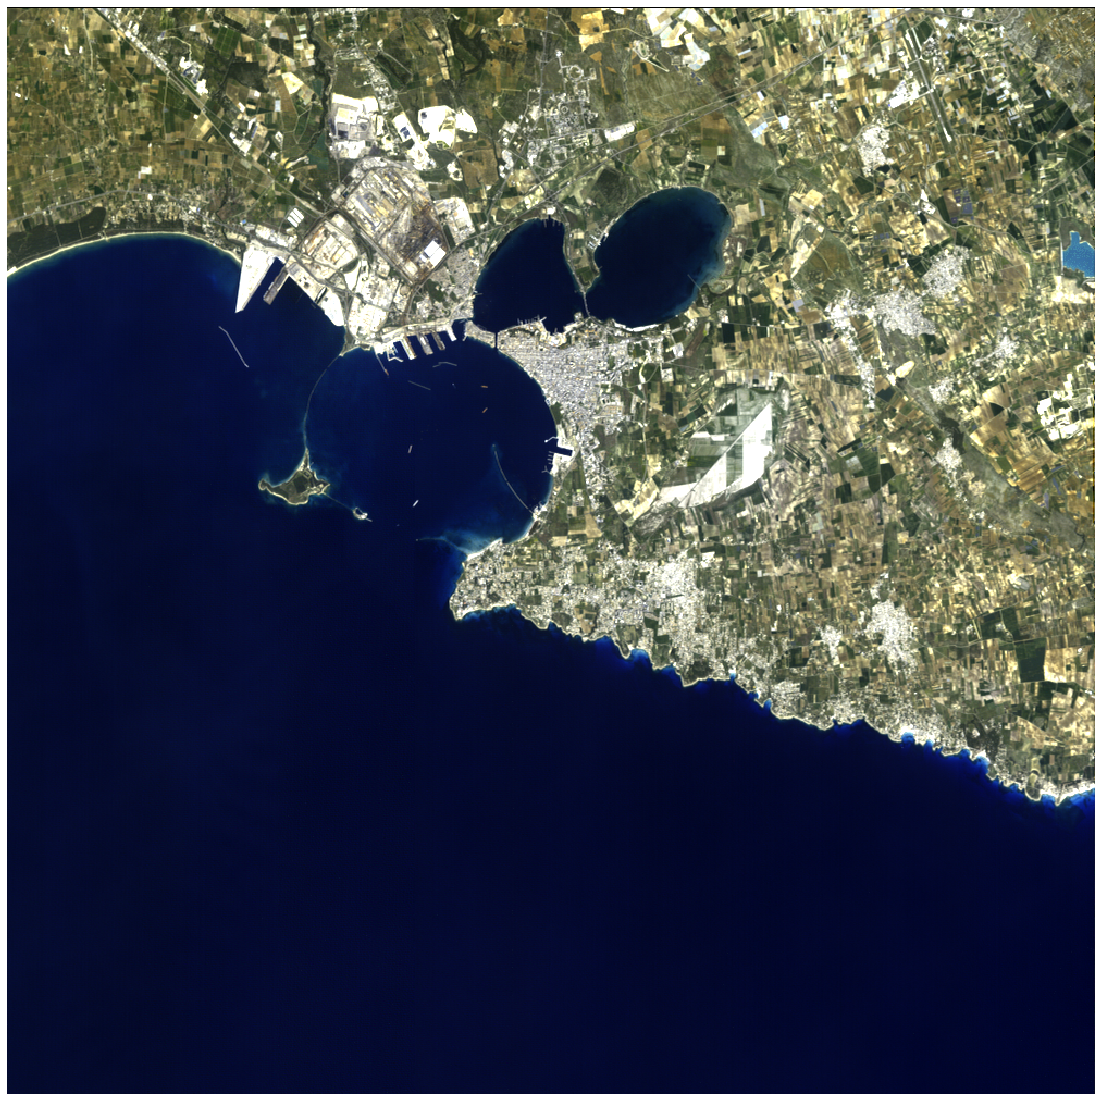

In [145]:
plt.figure(figsize=(20,20))
plt.axis("off"); plt.imshow(rgbImg); plt.show()

# 6. IRFC Composite

In [139]:
r = vnir_rot_cube[:, np.where(VNIR_BANDS == 844.1955)[0][0], :]
g = vnir_rot_cube[:, np.where(VNIR_BANDS == 669.6074)[0][0], :]
b = vnir_rot_cube[:, np.where(VNIR_BANDS == 562.55664)[0][0], :]

In [140]:
MULT_FACTOR = 2

rgbImg = np.zeros((1000,1000,3))
rgbImg[:,:,0] = (r - r.min()) / (r.max()-r.min()) * MULT_FACTOR
rgbImg[:,:,1] = (g - g.min()) / (g.max()-g.min()) * MULT_FACTOR
rgbImg[:,:,2] = (b - b.min()) / (b.max()-b.min()) * MULT_FACTOR 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


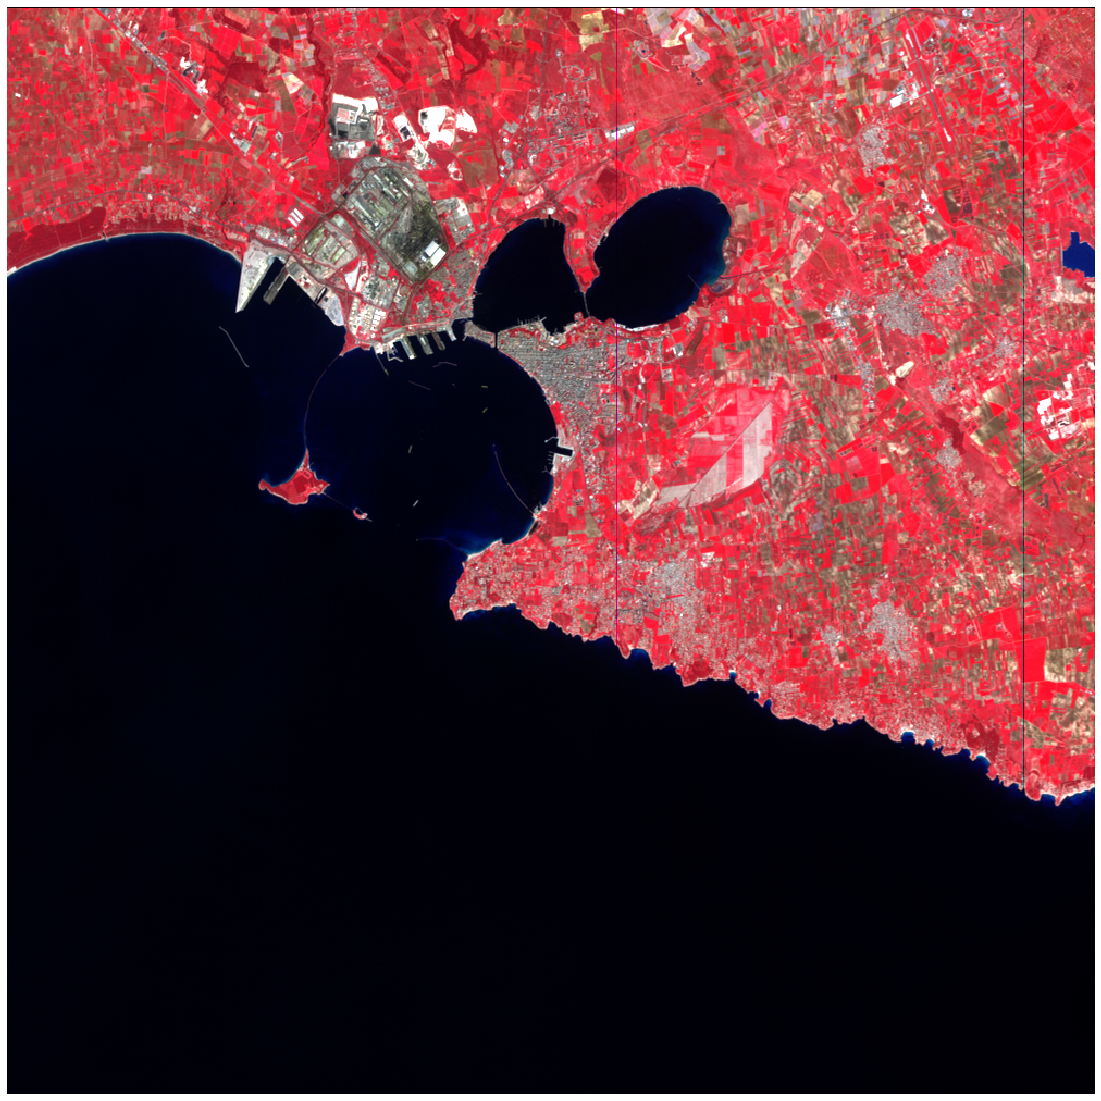

In [141]:
plt.figure(figsize=(20,20))
plt.axis("off"); plt.imshow(rgbImg); plt.show()

# 7. Spectral Signature

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


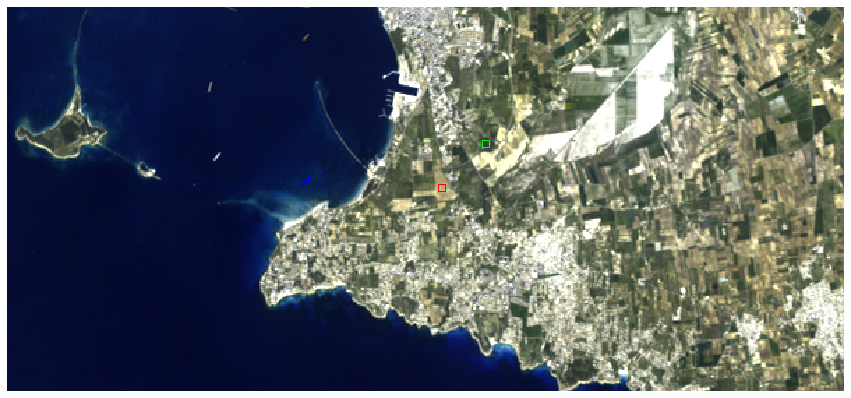

In [163]:
fig,ax = plt.subplots(1, figsize=(15,15))

ax.imshow(rgbImg[350:625,225:825,:])

ax.add_patch(Rectangle((308,126),5,5, linewidth=1,edgecolor='#FF0000',facecolor='none'))
ax.add_patch(Rectangle((340, 95),5,5, linewidth=1,edgecolor='#00FF00',facecolor='none'))
ax.add_patch(Rectangle((210,120),5,5, linewidth=1,edgecolor='#0000FF',facecolor='none'))

plt.axis('off'); plt.show()

In [167]:
def calcSubsetCoords(centerCoords, kernel):
    ker_ = int((kernel - 1)/2)
    x = list(range(centerCoords[1]-ker_,centerCoords[1]+ker_+1))
    y = list(range(centerCoords[0]-ker_,centerCoords[0]+ker_+1))
    result = list(itertools.product(x,y))
    return(result)

In [174]:
terrainPixelCoords = (476,533)
grassPixelCoords = (445,565)
waterPixelCoords = (470,435)

terrainSubsetPixel = calcSubsetCoords(terrainPixelCoords, 5)
grassSubsetPixel = calcSubsetCoords(grassPixelCoords, 5)
waterSubsetPixel = calcSubsetCoords(waterPixelCoords, 5)

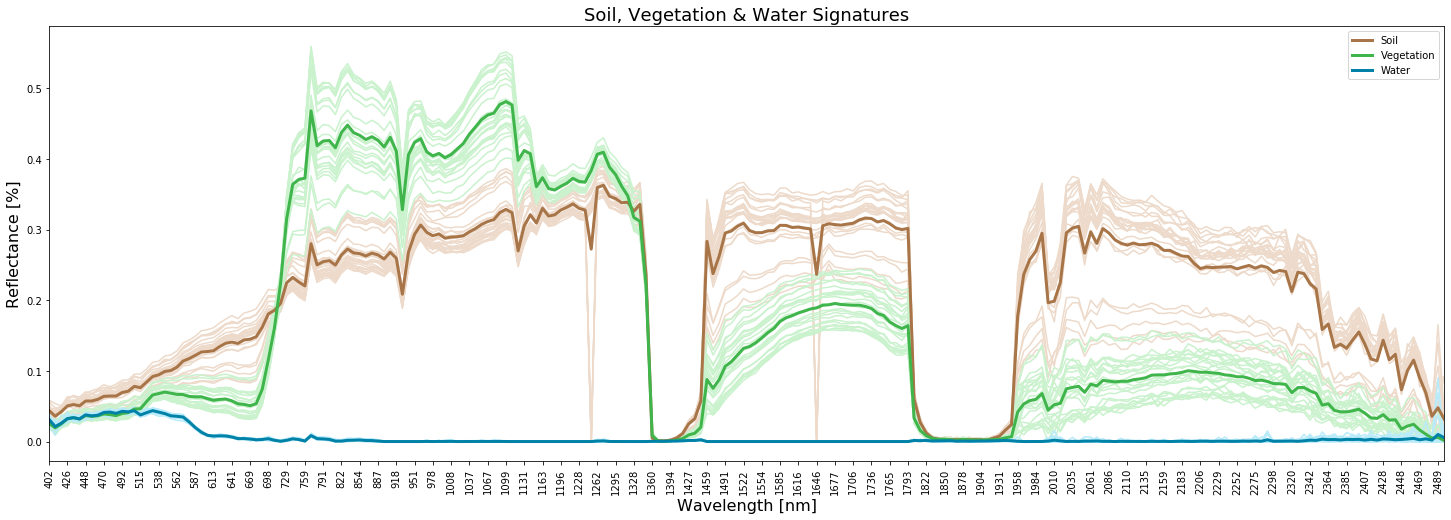

In [183]:
plt.figure(figsize=(25,8))

# Init Empty Signatures
averagedTerrainSignature = np.zeros(230)
averagedVegetationSignature = np.zeros(230)
averagedWaterSignature = np.zeros(230)

# Plotting signatures
for coords in terrainSubsetPixel:
    vnir_sig = np.concatenate([np.flip(vnir_rot_cube[coords[1],:,coords[0]])/65535,np.zeros(164)])
    swir_sig = np.concatenate([np.zeros(63),(np.flip(swir_rot_cube[coords[1],:,coords[0]])[6:]/65535)])
    plt.plot((vnir_sig+swir_sig), c="#EDDACA")
    averagedTerrainSignature += np.array(vnir_sig+swir_sig)
    
for coords in grassSubsetPixel:
    vnir_sig = np.concatenate([np.flip(vnir_rot_cube[coords[1],:,coords[0]])/65535,np.zeros(164)])
    swir_sig = np.concatenate([np.zeros(63),(np.flip(swir_rot_cube[coords[1],:,coords[0]])[6:]/65535)])
    plt.plot((vnir_sig+swir_sig), c="#C9F2CD")
    averagedVegetationSignature += np.array(vnir_sig+swir_sig)

for coords in waterSubsetPixel:
    vnir_sig = np.concatenate([np.flip(vnir_rot_cube[coords[1],:,coords[0]])/65535,np.zeros(164)])
    swir_sig = np.concatenate([np.zeros(63),(np.flip(swir_rot_cube[coords[1],:,coords[0]])[6:]/65535)])
    plt.plot((vnir_sig+swir_sig), c="#B9EBFA")
    averagedWaterSignature += np.array(vnir_sig+swir_sig)

plt.plot(averagedTerrainSignature/len(terrainSubsetPixel), color="#A87548",lw=3,label="Soil")    
plt.plot(averagedVegetationSignature/len(grassSubsetPixel), color="#3FB54B",lw=3,label="Vegetation")    
plt.plot(averagedWaterSignature/len(waterSubsetPixel), color="#0082A8",lw=3,label="Water")   

vnir_bands = np.concatenate([np.flip(VNIR_BANDS),np.zeros(164)])
swir_bands = np.concatenate([np.zeros(63),np.flip(SWIR_BANDS)[6:]])

plt.xticks(
    range(0,len(vnir_bands),3),
    labels=(vnir_bands + swir_bands).astype("int")[::3],
    rotation='vertical')

plt.title("Soil, Vegetation & Water Signatures",size=18)
plt.xlabel("Wavelength [nm]",size=16); plt.ylabel("Reflectance [%]",size=16)
plt.xlim(0,len(vnir_bands)-1); plt.legend(); plt.show()